In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('prodlog.csv', parse_dates = True)

In [3]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [4]:
df['Time Elapsed'] = (df['End Date'] - df['Start Date'])
df['Time Elapsed'] = df['Time Elapsed'] + np.timedelta64(1, 'D')
df['Time Elapsed'] = df['Time Elapsed'].dt.days #Creating a column that describes the amount of time a job ran for
df = df.drop(['Factor'], axis = 1)

In [5]:
df = df.drop(df[df['Time Elapsed'] <= 0].index)
df['PartsPerDay'] = df['# Parts Made'] / df['Time Elapsed']
df['PartsPerHour'] = df['PartsPerDay'] / 8
df['WC'] = df['WC'].str.upper()
df.describe()
#Average Job Length: 2.4 Days
#(Converted to working hours, 19.2 work-hours. Assuming minimum wage of $8.55, each job costs an average of $164.16 in labor.)
#Average Parts Per Hour: 3.89
#Average Cost Per Part: $8.55 / 3.89 = $2.20 (Most likely scaled down significantly due to smaller part batches.)

,# Parts Made,Time Elapsed,PartsPerDay,PartsPerHour
count,22105.000000,22119.000000,22105.000000,22105.000000
mean,57.029156,2.395407,31.104681,3.888085
std,110.163909,6.485991,46.728468,5.841059
min,0.000000,1.000000,0.000000,0.000000
25%,10.000000,1.000000,8.000000,1.000000
50%,23.000000,1.000000,16.000000,2.000000
75%,59.000000,2.000000,34.000000,4.250000
max,2658.000000,370.000000,803.000000,100.375000


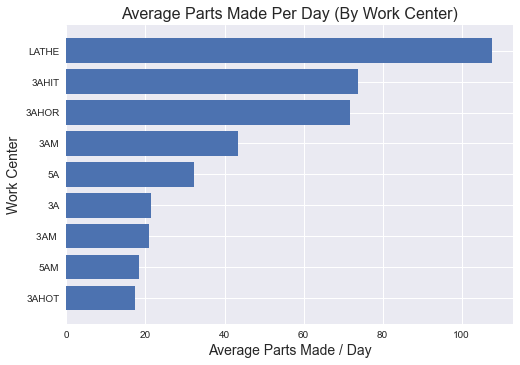

In [131]:
%matplotlib inline
data = df.groupby('WC').mean().sort_values('# Parts Made')
plt.style.use('seaborn')
plt.barh(data.index, data['# Parts Made'])
plt.title('Average Parts Made Per Day (By Work Center)', fontsize = 16)
plt.xlabel('Average Parts Made / Day', fontsize = 14)
plt.ylabel('Work Center', fontsize = 14);
#Lathes create the most parts in a day, which is expected given that they create smaller parts with less finesse needed.

Fox made 134331.0 parts. This is 10.66% of all parts made.


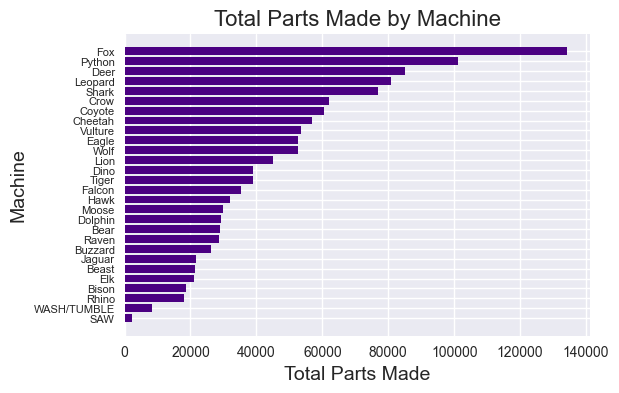

In [130]:
%matplotlib inline
data2 = df.groupby('Name').sum().sort_values('# Parts Made')
fig, ax = plt.subplots()
ax.barh(data2.index, data2['# Parts Made'], color = 'Indigo')
plt.style.use('seaborn')
fig.set_dpi(100)
plt.title('Total Parts Made by Machine', fontsize = 16)
plt.ylabel('Machine', fontsize = 14)
plt.xlabel('Total Parts Made', fontsize = 14)
plt.yticks(fontsize = 8);
topcount = data2['# Parts Made'].iloc[-1]
topcountpercent = round(((topcount / data2['# Parts Made'].sum()) * 100), 2)
print(f"Fox made {topcount} parts. This is {topcountpercent}% of all parts made.")
#Fox has the most usage of all of the machines, which makes sense given that it's a Lathe.
#The next highest are Python and Deer, 3-Axis Hitachi Seikis.

29.85% of all jobs take <= 1 day.
33.51% of all jobs take <= 2 days.


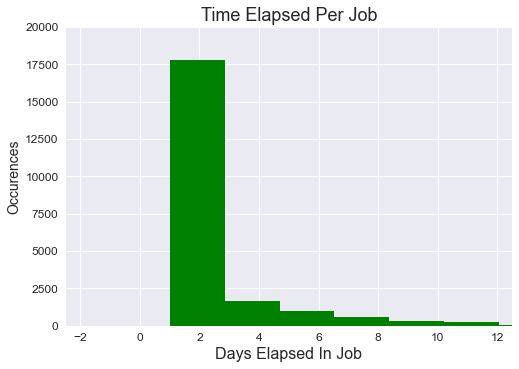

In [150]:
%matplotlib inline
machineHist = df['Time Elapsed']
plt.style.use('seaborn')
plt.hist(machineHist, bins = 200, color = 'Green')
plt.xlim(xmin = -2.5, xmax = 12.5)
plt.ylim(ymin = 0, ymax = 20_000)
plt.title('Time Elapsed Per Job', fontsize = 18)
plt.xlabel('Days Elapsed In Job', fontsize = 16)
plt.ylabel('Occurences', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
day1percent = (machineHist.value_counts().iloc[0] / machineHist.sum()) * 100
day2percent = ((machineHist.value_counts().iloc[1] + machineHist.value_counts().iloc[0]) / machineHist.sum()) * 100
print(f"{round(day1percent, 2)}% of all jobs take <= 1 day.")
print(f"{round(day2percent, 2)}% of all jobs take <= 2 days.")
#Histogram of End Date - Start date for each job. 

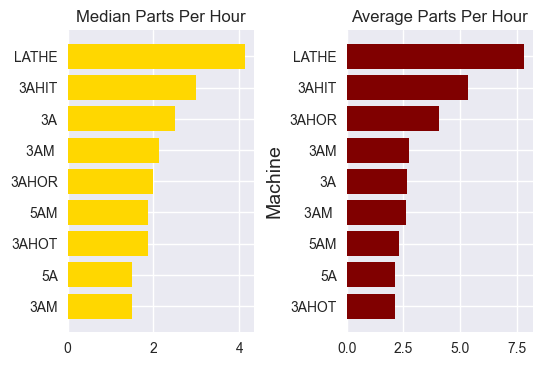

In [9]:
%matplotlib inline
wcMedians = df.groupby('WC').median().sort_values('PartsPerHour', ascending = True)
wcMeans = df.groupby('WC').mean().sort_values('PartsPerHour', ascending = True)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(100)
plt.ylabel('Machine', fontsize = 14)
plt.subplots_adjust(wspace = .5)
plt.style.use('seaborn')
ax1.barh(wcMedians.index, wcMedians['PartsPerHour'], color = 'Gold')
ax2.barh(wcMeans.index, wcMeans['PartsPerHour'], color = 'Maroon')
ax1.set_title('Median Parts Per Hour')
ax2.set_title('Average Parts Per Hour'); #Which work centers have the largest hourly output? Lathes create the most parts, but they may be smaller than those created by larger machines.

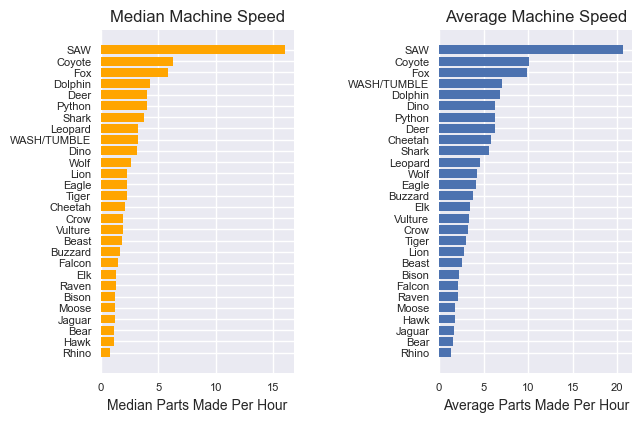

In [145]:
%matplotlib inline
mMedians = df.groupby('Name').median().sort_values('PartsPerHour', ascending = True)
mMeans = df.groupby('Name').mean().sort_values('PartsPerHour', ascending = True)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()
fig.set_dpi(100)
plt.style.use('seaborn')
plt.subplots_adjust(wspace = .75)
ax1.barh(mMedians.index, mMedians['PartsPerHour'], color = 'Orange')
ax2.barh(mMeans.index, mMeans['PartsPerHour'])
ax1.set_title('Median Machine Speed', fontsize = 12)
ax2.set_title('Average Machine Speed', fontsize = 12)
ax1.set_xlabel('Median Parts Made Per Hour', fontsize = 10)
ax2.set_xlabel('Average Parts Made Per Hour', fontsize = 10)
ax1.tick_params(labelsize = 8)
ax2.tick_params(labelsize = 8);
#The Saw is by far the highest output machine, with Coyote and Fox not far behind (both Lathes).

<Figure size 432x288 with 0 Axes>

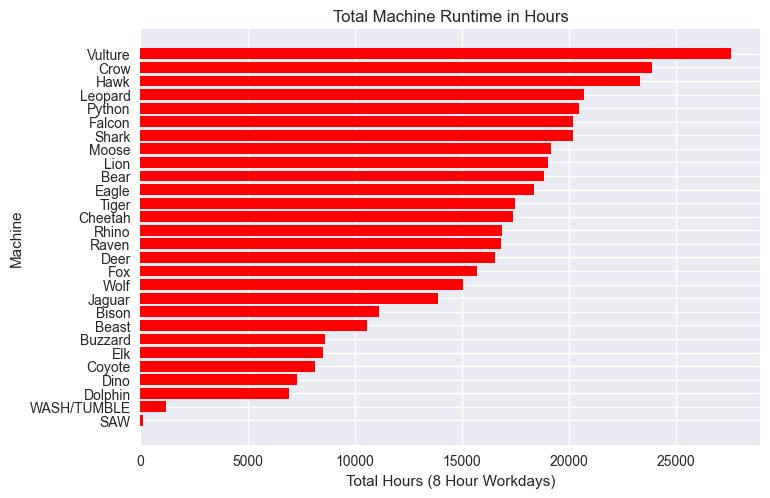

In [72]:
%matplotlib inline
mTime = df.groupby('Name').sum().sort_values('Time Elapsed', ascending = True)
mTime = mTime['Time Elapsed']
mTime = mTime * 8
plt.tight_layout()
plt.style.use('seaborn')
fig, ax = plt.subplots()
fig.set_dpi(100)
ax.barh(mTime.index, mTime, color = 'Red');
plt.title('Total Machine Runtime in Hours')
plt.xlabel('Total Hours (8 Hour Workdays)')
plt.ylabel('Machine');

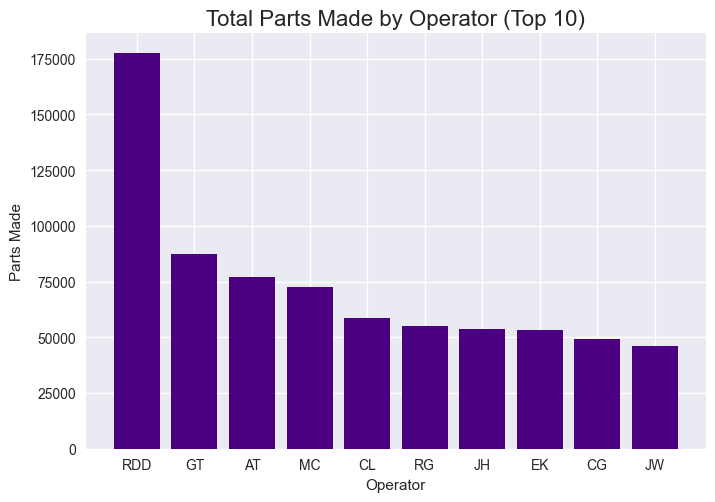

In [12]:
opSum = df.groupby('Operator').sum().sort_values('# Parts Made', ascending = False)
opSum = opSum.iloc[:10]
fig, ax = plt.subplots()
fig.set_dpi(100)
plt.style.use('seaborn')
ax.bar(opSum.index, opSum['# Parts Made'], color = 'Indigo')
ax.set_xlabel('Operator')
ax.set_ylabel('Parts Made')
ax.set_title('Total Parts Made by Operator (Top 10)', fontsize = 16);

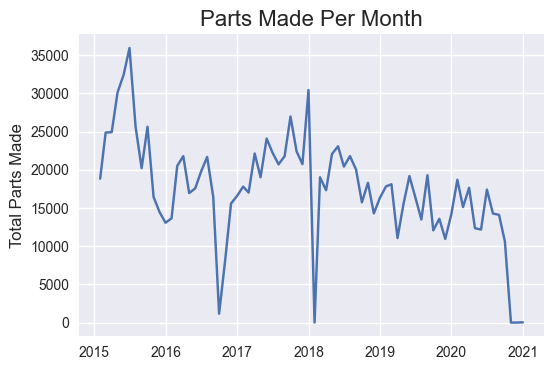

In [13]:
%matplotlib inline
partDates = df.groupby('End Date').sum()
partDates = partDates.resample('M').sum()
fig, ax = plt.subplots()
fig.set_dpi(100)
plt.style.use('seaborn')
ax.plot(partDates['# Parts Made'])
plt.title('Parts Made Per Month', fontsize = 16)
plt.ylabel('Total Parts Made', fontsize = 12);

In [71]:
df_monthly = df
df_monthly.index = df_monthly['End Date']

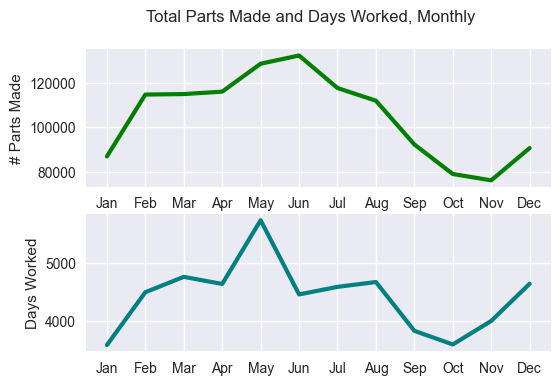

In [70]:
%matplotlib inline
by_month = df_monthly.groupby(df_monthly.index.month).sum()
by_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_dpi(100)
fig.suptitle('Total Parts Made and Days Worked, Monthly')
ax1.plot(by_month.index, by_month['# Parts Made'], linewidth = 3, c='Green')
ax2.plot(by_month.index, by_month['Time Elapsed'], linewidth = 3, c='Teal')
ax1.set_ylabel('# Parts Made')
ax2.set_ylabel('Days Worked')
plt.style.use('seaborn') 
#This graph returns a grouped sum of parts made in a month.
#Total production is highest during the month of June over the past 5 years. Production lows were hit in November.
#The graphs generally move together, though the highest number of days worked is generally in May.
#Anticipate the summer months to be higher output, with lower output during the colder seasons.